In [1]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr
from xlayers import finegrid, layers
from xlayers.core import layers_apply
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [2]:
#Let's set the basin width to 6000km (and make it constant for now)
La = 6*10**6*np.ones(144)

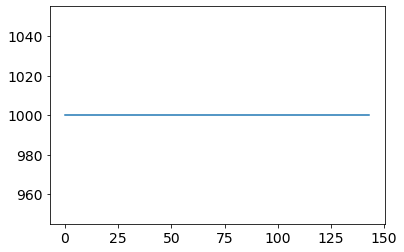

In [3]:
# We are going to pretend that the ocean is 4000m deep and look at a layer between some isopycnal and the bottom
#that layer has thickness modelh - again constant for now
modelh=4000-1000*np.ones(144)#

#if you want to play around with changing modelh so it is not constant, start here
#modelh =(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)

#so the depth of the isopycnal is 4000-modelh
plt.plot(4000-modelh)

In [4]:
#set up latitude
lat = np.linspace(-70,70,144)

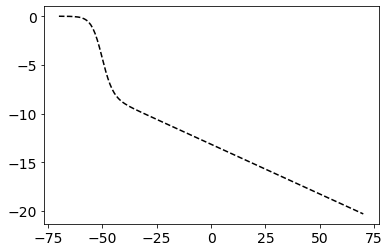

In [5]:
#Here's the transport in Sv
vatl=(-6*np.ones(144)*10**6-np.arange(0,144)*10**5)*(np.tanh((np.arange(0,144)-20)/5)+1)/2

plt.plot(lat,vatl/10**6,'k--')

In [6]:
#modern
import redi_analytical as ra

#Set isopycnal mixing equal to 500
modelkappa=500*np.ones(144)

# we're going to run this model for a 540000 timesteps
ntime=540000

vatl_in=vatl

#The output of this model is tracer concentration (C) 
C500=ra.redi_simple(lat,modelkappa,vatl_in,La,modelh,ntime,10**-2)


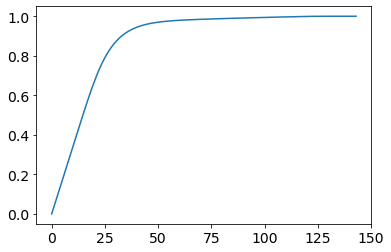

In [7]:
#so to plot tracer concentration 
plt.plot(C500[:,0])